In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression


data = pd.read_csv('creditcard.csv')
print(data.head())
print(data.info())
print(data['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


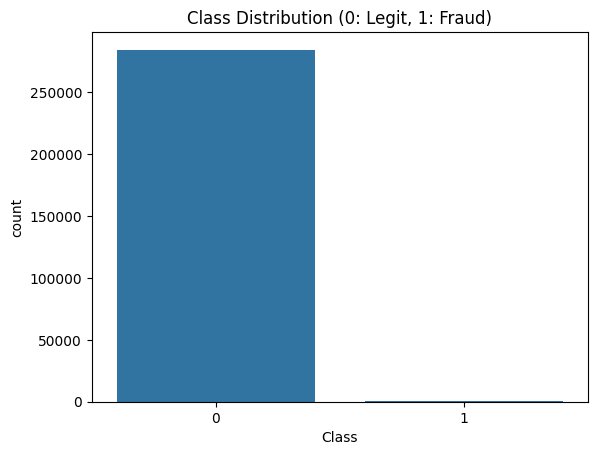

In [3]:
print(data.isnull().sum())

sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Legit, 1: Fraud)')
plt.show()

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [5]:
from sklearn.model_selection import train_test_split

# возьмем 20% данных для ускорения
X_sample, _, y_sample, _ = train_test_split(
    X, y,
    test_size=0.8,
    random_state=42,
    stratify=y
)

# Новые обучающая и тестовая выборки (10% данных)
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.3,
    random_state=42,
    stratify=y_sample
)
print(f"Размеры данных: Train={X_train.shape}, Test={X_test.shape}")

Размеры данных: Train=(39872, 30), Test=(17089, 30)


In [7]:
# Функция для оценки моделей
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    print(f"\nОценка {model.__class__.__name__}:")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Precision:", precision_score(y_test, pred))
    print("Recall:", recall_score(y_test, pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))

# Модели
models_light = [
    RandomForestClassifier(n_estimators=50, max_depth=3, random_state=1),
    GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=0),
    ExtraTreesClassifier(n_estimators=50, max_depth=3, random_state=0),
    LogisticRegression(random_state=0, solver='liblinear'),
    AdaBoostClassifier(n_estimators=50, random_state=0)
]

for model in models_light:
    evaluate_model(model, X_train, y_train, X_test, y_test)


Оценка RandomForestClassifier:
Accuracy: 0.9992392767277196
Precision: 0.8636363636363636
Recall: 0.6551724137931034
Confusion Matrix:
 [[17057     3]
 [   10    19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17060
           1       0.86      0.66      0.75        29

    accuracy                           1.00     17089
   macro avg       0.93      0.83      0.87     17089
weighted avg       1.00      1.00      1.00     17089


Оценка GradientBoostingClassifier:
Accuracy: 0.9988881736789748
Precision: 0.6923076923076923
Recall: 0.6206896551724138
Confusion Matrix:
 [[17052     8]
 [   11    18]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17060
           1       0.69      0.62      0.65        29

    accuracy                           1.00     17089
   macro avg       0.85      0.81      0.83     17089
weighted avg 

# Увеличение признаков

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

print("\nРазмер после увеличения признаков:")
print("Train:", X_poly_train.shape)
print("Test:", X_poly_test.shape)

for model in models_light:
    evaluate_model(model, X_poly_train, y_train, X_poly_test, y_test)


Размер после увеличения признаков:
Train: (39872, 495)
Test: (17089, 495)

Оценка RandomForestClassifier:
Accuracy: 0.9992977939025104
Precision: 0.8695652173913043
Recall: 0.6896551724137931
Confusion Matrix:
 [[17057     3]
 [    9    20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17060
           1       0.87      0.69      0.77        29

    accuracy                           1.00     17089
   macro avg       0.93      0.84      0.88     17089
weighted avg       1.00      1.00      1.00     17089


Оценка GradientBoostingClassifier:
Accuracy: 0.9990052080285564
Precision: 0.6875
Recall: 0.7586206896551724
Confusion Matrix:
 [[17050    10]
 [    7    22]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17060
           1       0.69      0.76      0.72        29

    accuracy                           1.00     17089
   m

C:\Users\Alexandr\anaconda3\envs\gpu\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Оценка LogisticRegression:
Accuracy: 0.9997659313008368
Precision: 0.9629629629629629
Recall: 0.896551724137931
Confusion Matrix:
 [[17059     1]
 [    3    26]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17060
           1       0.96      0.90      0.93        29

    accuracy                           1.00     17089
   macro avg       0.98      0.95      0.96     17089
weighted avg       1.00      1.00      1.00     17089


Оценка AdaBoostClassifier:
Accuracy: 0.9993563110773012
Precision: 0.9090909090909091
Recall: 0.6896551724137931
Confusion Matrix:
 [[17058     2]
 [    9    20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17060
           1       0.91      0.69      0.78        29

    accuracy                           1.00     17089
   macro avg       0.95      0.84      0.89     17089
weighted avg       1.00   

# Уменьшение признаков

In [14]:
from sklearn.decomposition import PCA

# Применяем PCA, оставляя 95% дисперсии
pca = PCA(n_components=0.95, random_state=42)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

print(f"Исходное количество признаков: {X_train.shape[1]}")
print(f"Количество признаков после PCA: {X_pca_train.shape[1]}")

print("\nОценка моделей после PCA:")
for model in models_light:
    evaluate_model(model, X_pca_train, y_train, X_pca_test, y_test)

Исходное количество признаков: 30
Количество признаков после PCA: 23

Оценка моделей после PCA:

Оценка RandomForestClassifier:
Accuracy: 0.9991807595529287
Precision: 0.8571428571428571
Recall: 0.6206896551724138
Confusion Matrix:
 [[17057     3]
 [   11    18]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17060
           1       0.86      0.62      0.72        29

    accuracy                           1.00     17089
   macro avg       0.93      0.81      0.86     17089
weighted avg       1.00      1.00      1.00     17089


Оценка GradientBoostingClassifier:
Accuracy: 0.9983030019310668
Precision: 0.0
Recall: 0.0
Confusion Matrix:
 [[17060     0]
 [   29     0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17060
           1       0.00      0.00      0.00        29

    accuracy                           1.00     17089
 

C:\Users\Alexandr\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Alexandr\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Alexandr\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ale

Precision: 0.8333333333333334
Recall: 0.3448275862068966
Confusion Matrix:
 [[17058     2]
 [   19    10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17060
           1       0.83      0.34      0.49        29

    accuracy                           1.00     17089
   macro avg       0.92      0.67      0.74     17089
weighted avg       1.00      1.00      1.00     17089


Оценка LogisticRegression:
Accuracy: 0.9994733454268828
Precision: 0.8846153846153846
Recall: 0.7931034482758621
Confusion Matrix:
 [[17057     3]
 [    6    23]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17060
           1       0.88      0.79      0.84        29

    accuracy                           1.00     17089
   macro avg       0.94      0.90      0.92     17089
weighted avg       1.00      1.00      1.00     17089


Оценка AdaBoostClassifier: